In [1]:
%autosave 0

Autosave disabled


In [2]:
from IPython.core.display import HTML
#css_file = '../../../style/style03my.css'
css_file = '../../../style/style01.css'
HTML(open(css_file, "r").read())

>### [Sergio Rojas](http://prof.usb.ve/srojas)<br>
[Departamento de F&iacute;sica](http://www.fis.usb.ve/), [Universidad Sim&oacute;n Bol&iacute;var](http://www.usb.ve/), [Venezuela](http://es.wikipedia.org/wiki/Venezuela)

>#### Content under [Creative Commons Attribution license CC-BY 4.0](http://creativecommons.org/licenses/by/4.0/), [code under MIT license (c)](http://en.wikipedia.org/wiki/MIT_License)2016-2017 Sergio Rojas (srojas@usb.ve).###

In [3]:
from IPython.display import HTML
from IPython.display import Image

In [4]:
#Image(filename='./img/ex_regression.png', width=720, height=720)

In [5]:
#HTML('<iframe src=https://docs.scipy.org/doc/scipy/reference/optimize.html width=700 height=350></iframe>')

### <center><font color=red>[Logistic regression classification](https://en.wikipedia.org/wiki/Logistic_regression)</font> </center>#



\begin{aligned}
        {\textbf h}_{\theta}(x) = S({\mathbf \theta}^{\mathbf T}{\textbf X}) = \frac{1}{1 + e^{-\, {\mathbf \theta}^{\mathbf T}{\textbf X}}}      
%        
        \end{aligned}
        
  \begin{aligned}
        S(x) = \frac{1}{1 + e^{-x}} = \frac{1}{2} + \frac{1}{2}tanh(\frac{x}{2})  
%        
        \end{aligned}
where $S(x)$ is known as the [logistic (sigmoid) function](https://en.wikipedia.org/wiki/Sigmoid_function). It is the cumulative distribution function of the logistic distribution shown below.

Assume that the outcome 
$$
y = \begin{cases}
   1  & \text{if ${\textbf h}_{\theta}(x) \ge 0.5$} \\
   0  & \text{ otherwise }
   \end{cases}
$$     
Since $S(x) \ge 0.5$ if $x \ge 0$, the above condition means to predict $y=1$ if ${\mathbf \theta}^{\mathbf T}{\textbf X} \ge 0$ and to predict $y=0$ if ${\mathbf \theta}^{\mathbf T}{\textbf X} \lt 0$ (the condition ${\mathbf \theta}^{\mathbf T}{\textbf X} = 0$ gives what is called the <b>decission boundary</b>.

##### <font color=red>Findin the parameter $ \theta $</font>

To find the best parameters $\theta_i$, the opimization problem is usually posed in terms of ** *minimizing* ** the (convex) cost measure:

\begin{aligned}
        J(\theta) &= \frac{1}{m} \sum_{i=1}^{m} j(h_{\theta}(x^{(i)}), y^{(i)}) \\
        % j(h_{\theta}(x), y) &= \frac{1}{2}
        % \left[ h_{\theta}(x) - y \right]^2 \\
j(h_{\theta}(x), y)  &= \begin{cases}
   -\ln{\left[ {\textbf h}_{\theta}(x) \right]} & \text{if $ y = 1$} \\
   -\ln{\left[1 - {\textbf h}_{\theta}(x) \right]} & \text{if $ y = 0 $ }
   \end{cases}    \\      
        J(\theta) &= - \frac{1}{m} \sum_{i=1}^{m} \left( 
        y{(i)}\ln\left[{h_{\theta}(x^{(i)})}\right] + \left( 1 -y^{(i)}\right)\ln\left[1 - {h_{\theta}(x^{(i)})}\right]  \right)
        \end{aligned}

\begin{aligned}
        \frac{\partial J(\theta)}{\!\!\!\! \partial \theta_k} 
                  &= \frac{1}{m}\sum_{i=1}^m \left[{h_{\theta}(x^{(i)})} - y^{(i)})\right]x^{(i)}_{k}
        \end{aligned}

<font color=red>**minimizing** $J(\theta)$ we find the $\theta$'s. Then, given an $\mathbf{X}$, predictions can be made using</font>:
\begin{aligned}
        {\textbf h}_{\theta}(x) = \frac{1}{1 + e^{-\, {\mathbf \theta}^{\mathbf T}{\textbf X}}}      
%        
        \end{aligned}


### <center><font color=red>Coding the logistic regression algorithm</font></center>

##### <font color=red>The sigmoid $S(x)$ function</font>

In [6]:
def sigmoid(z):
    import scipy.special
    # This function compute sigmoid functoon
    # using SciPy expit(z) function
    # Sergio Rojas
    
    s = scipy.special.expit(z)

    return s

##### <font color=red>The cost $J(\theta)$ function and its gradient $\nabla_\theta J(\theta)$</font>

In [7]:
def JandGrad(theta, X, y):
    import numpy as np
    #   This function computes the cost J(theta)
    #   for logistic regression and the its gradient
    #   respectto the parameters theta.
    #
    # y is a one column vector
    # X is a matrix first column filled with ones (see first exercise set)
    # theta is a column vector
    # Sergio Rojas

    m = len(y) # number of training examples
    grad = np.zeros(np.size(theta))
    #  Computing J
    # ---------
    u = np.dot(X,theta)  # One column vector
    h = sigmoid(u)       # One column vector

    # The sum on J(theta) is implemented using scalar product 
    # of the vectors invloved. Each one is one column vector
    #----
    yT = np.transpose(y)
    thesum = - np.dot(yT, np.log(h)) - np.dot((1.0 - yT),np.log(1.0-h));

    J = (1.0/m) * thesum;

    #  Computing grad of J(theta)
    # ---------
    grad = np.dot(np.transpose(h-y), X); 
                                        
    grad = np.transpose(grad) ;    # transpose the grad
    grad = (1.0/m) * grad;

    return J, grad

##### <font color=red>Check that function JandGrad computes and return values</font>

In [8]:
import numpy as np
X = np.array(
[[1,     2,     3,     4],
 [1,     5,     6,     7],
 [1,     8,     9,     0]]
)

y = np.transpose(np.array([1, 0, 0]));
theta = np.transpose(np.array([-1, 0, 1, 2]));

J, grad = JandGrad(theta, X, y)

print(J)
print(grad)


9.00012693441
[ 0.66653975  4.33240879  4.99894854  2.33327279]


###  <font color=red>An example of logistic regression</font>

##### <font color=red>Test case [from Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression)</font>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sciopt
%matplotlib inline

In [10]:
def plot_1D(X, y):
    # X is one dimensional
    # y is one dimensional
    #----
    import numpy as np
    import matplotlib.pyplot as plt

    fig = plt.figure()
    ax  = fig.add_subplot(1, 1, 1)

    indxpos = np.where(y==1); indxneg = np.where(y == 0);

    ax.plot(X[indxpos].flatten(), y[indxpos].flatten(),
                               'r*', label="y = 1 cases ", markersize=14)
    ax.plot(X[indxneg].flatten(), y[indxneg].flatten(),
                               'bo', label="y = 0 cases",markersize=8)
    ax.set_ylim(-.2,1.4)
    return fig, ax

In [11]:
# Load Data
data = np.loadtxt('./Data/ex1_1D_data.dat', delimiter=',', skiprows=1)
X = data[:,0]
y = data[:,1]

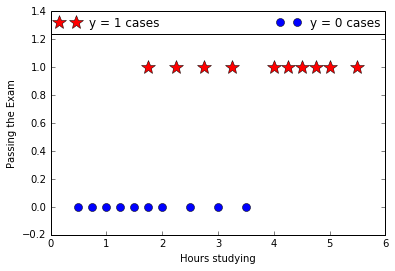

In [12]:
fig, ax1 = plot_1D(X, y)
#
ax1.set_xlabel('Hours studying')
ax1.set_ylabel('Passing the Exam')
ax1.legend(bbox_to_anchor=(0., .9, 1., .9), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

In [13]:
if X.ndim==1: X=X[:,None] # Make a 1-column array
m, n = np.shape(X) #

# Add intercept term to X
X = np.column_stack((np.ones(m), X))

# Initialize theta parameters
initial_theta = np.zeros(n + 1)

J, gradJ = JandGrad(initial_theta, X, y)
print ('    J at initial theta: ', J)
print ('GradJ at initial theta:', gradJ)

    J at initial theta:  0.69314718056
GradJ at initial theta: [ 0.      -0.50625]


In [14]:
res = sciopt.minimize(JandGrad, initial_theta, args=(X,y), \
                       method='BFGS', jac=True, options={'maxiter':400})
theta = res.x
J = res.fun

In [15]:
print ('Optimal theta:', theta)
print ('Cost J at optimal theta: ', J)
print('\n')
print('Result for     Hours = {0:10.4f}'.format(theta[1]) )
print('Result for Intercept = {0:10.4f}'.format(theta[0]) )


Optimal theta: [-4.07771408  1.50464686]
Cost J at optimal theta:  0.40149392321797317


Result for     Hours =     1.5046
Result for Intercept =    -4.0777


##### <font color=red>The data and its probability</font>

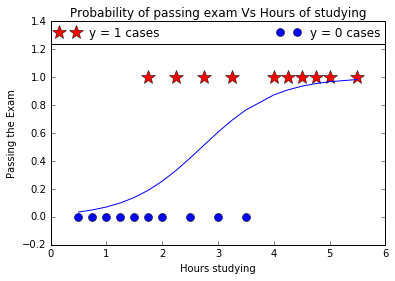

In [16]:
u = np.dot(X,theta)
h = sigmoid(u)

fig, ax1 = plot_1D(data[:,0], y)

ax1.plot(data[:,0],h)

ax1.set_xlabel('Hours studying')
ax1.set_ylabel('Passing the Exam')
ax1.set_title('Probability of passing exam Vs Hours of studying')
ax1.legend(bbox_to_anchor=(0., .9, 1., .9), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()


##### <font color=red>Evaluating the prediction on the training data set</font>

In [17]:
p = np.zeros(m)
temp = np.dot(X, theta);
indx=np.where(temp>=0)
p[indx] = 1;
print ('Train Accuracy: {0:4.2f}% '.format((np.mean(p == y) * 100)) )

Train Accuracy: 80.00% 


##### <font color=red>Making predictions:</font>

In [18]:
hours = 4
x = np.array([1,hours])
temp = np.dot(x, theta);
print ('The Probability of passing exam after {0} hours of studying is {1:4.2f}\
                                   '.format(hours,(sigmoid(temp))) )

The Probability of passing exam after 4 hours of studying is 0.87                                   


##### <font color=red>Extra: finding the solution using the L-BFGS-B method</font>

In [19]:
res = sciopt.minimize(JandGrad, initial_theta, args=(X,y), \
                       method='L-BFGS-B', jac=True, options={'maxiter':400})
theta = res.x
J = res.fun

In [20]:
print ('Optimal theta:', theta)
print ('Cost J at optimal theta: ', J)
print('\n')
print('Result for     Hours = {0:10.4f}'.format(theta[1]) )
print('Result for Intercept = {0:10.4f}'.format(theta[0]) )


Optimal theta: [-4.07771764  1.50464522]
Cost J at optimal theta:  0.401493923219


Result for     Hours =     1.5046
Result for Intercept =    -4.0777


### <font color=red>References</font> #

Additional discussion and examples can be found at:

- Hosmer, D. W. Jr., Lemeshow, S., and Sturdivant, R. X. (2013) Applied Logistic Regression, 3rd. edition, Wiley.
- [Scipy Lecture Notes: Mathematical optimization: finding minima of functions](http://www.scipy-lectures.org/advanced/mathematical_optimization/)
- [SciPy Cookbook: Optimization and fitting](http://scipy-cookbook.readthedocs.io/items/idx_optimization_and_fitting.html)

>#### Content under [Creative Commons Attribution license CC-BY 4.0](http://creativecommons.org/licenses/by/4.0/), [code under MIT license (c)](http://en.wikipedia.org/wiki/MIT_License)2016-2017 Sergio Rojas (srojas@usb.ve). ###
